## Name: Samyak  Jain
## Student ID: 47688408

In [ ]:
#Mounting Google Drive so as to read dataset csv file from Google Drive
from google.colab import drive
drive.mount('/content/drive')

# LendingClub Dataset
**Dataset Description：**
The dataset contains the homeloan records released from Lending Club. The problem lenders care is that whether a borrower can repay homeloan and interest on time. In addition, the homeloan interest rate is highly related with the loan credit of borrowers. A borrower with a higher credit can easily get homeloan with a lower rate. The task of the project is to predict whehter a borrower can replay homeloan and interest on time based on a number of features of the borrower. This is a typical classification problem and this notebook demonstrate how to use Lending Club dataset to decide whether a homeloan case should be approved based a borrower' features. 

**Dataset Detail Information*
The dataset contains 9,578 recrds in total. Every record has 13 features and 1 label which are described as below. 
* credit.policy: This is the label. Its value is 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

* purpose: The purpose of the loan (takes values "creditcard", "debtconsolidation", "educational", "majorpurchase", "smallbusiness", “home_improvement” and "all_other").

* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

* installment: The monthly installments owed by the borrower if the loan is funded.

* log.annual.inc: The natural log of the self-reported annual income of the borrower.

* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

* fico: The FICO credit score of the borrower.Common FICO scores range from 300 to 850,with higher scores indicating better credit.

* days.with.cr.line: The number of days the borrower has had a credit line.

* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments

* not.fully.paid：Whether the borrower will be fully paid or not.

**Learning taks:**
1. Data should be preprocessed and cleaned. 
2. Feature selection should be conducted to remove irrelevant features.
3. Train a logistic regression model to predict "credit.policy" by using the other 13 features.
4. The logistic regression model should be evaluated with cross validation by using 5-10 folds.  

## Import Packages

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


## Load Dataset and Clean Dataset

The purpose of this part is to guarantee the data used in the notebook is reliable. 。

In [112]:
Data = pd.read_csv('/content/drive/MyDrive/Portfolio3/loan_data.csv')
Data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,NaN
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0.0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,471000.000000,3511,25.6,1,0,0,0.0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0.0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0.0


After loading the dataset into the notebook, we can further check basic information of the dataset such as data type. 

In [113]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9577 non-null   float64
dtypes: float64(7), int64(6), object(1)
memory usage: 1.0+ MB


According to the displayed dataset information, we can conclude that
1. The dataset is complete without missing any record. 
2. There are 13 features and 1 label. There are three possible datatypes, which are loat64,int64 and object
There are seven data types which are：credit_card, debt_consolidation, educational, major_purchase, small_business, home_improvement 和all_other。 Note that the type of purpose is object, which cannot be analyzed directly. This feature will be converted by OneHotEncoder or OrdinalEncoder.

Now, we can proveed to check basic statistical information of these features such as mean values, standard deviation, maximum and minimum values, etc. 

In [114]:
Data.shape

(9578, 14)

## Task 1: Based on Data info, please clean the dataset by removing abnormal data points or filling in missing values.  

In [115]:
# Check for missing values
Data.isnull().sum()


credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       1
dtype: int64

Here, we can observe that 'not.fully.paid' feature has one missing value. So, we will fill in the missing value with mean value.

In [116]:
# Calculating the mean of 'not.fully.paid' column
mean_value = Data['not.fully.paid'].mean()

# Fill in the missing value with the mean value
Data['not.fully.paid'] = Data['not.fully.paid'].fillna(mean_value)


In [117]:
#Verifying that missing value is filled for the not.fully.paid column
Data['not.fully.paid'].isnull().sum()


0

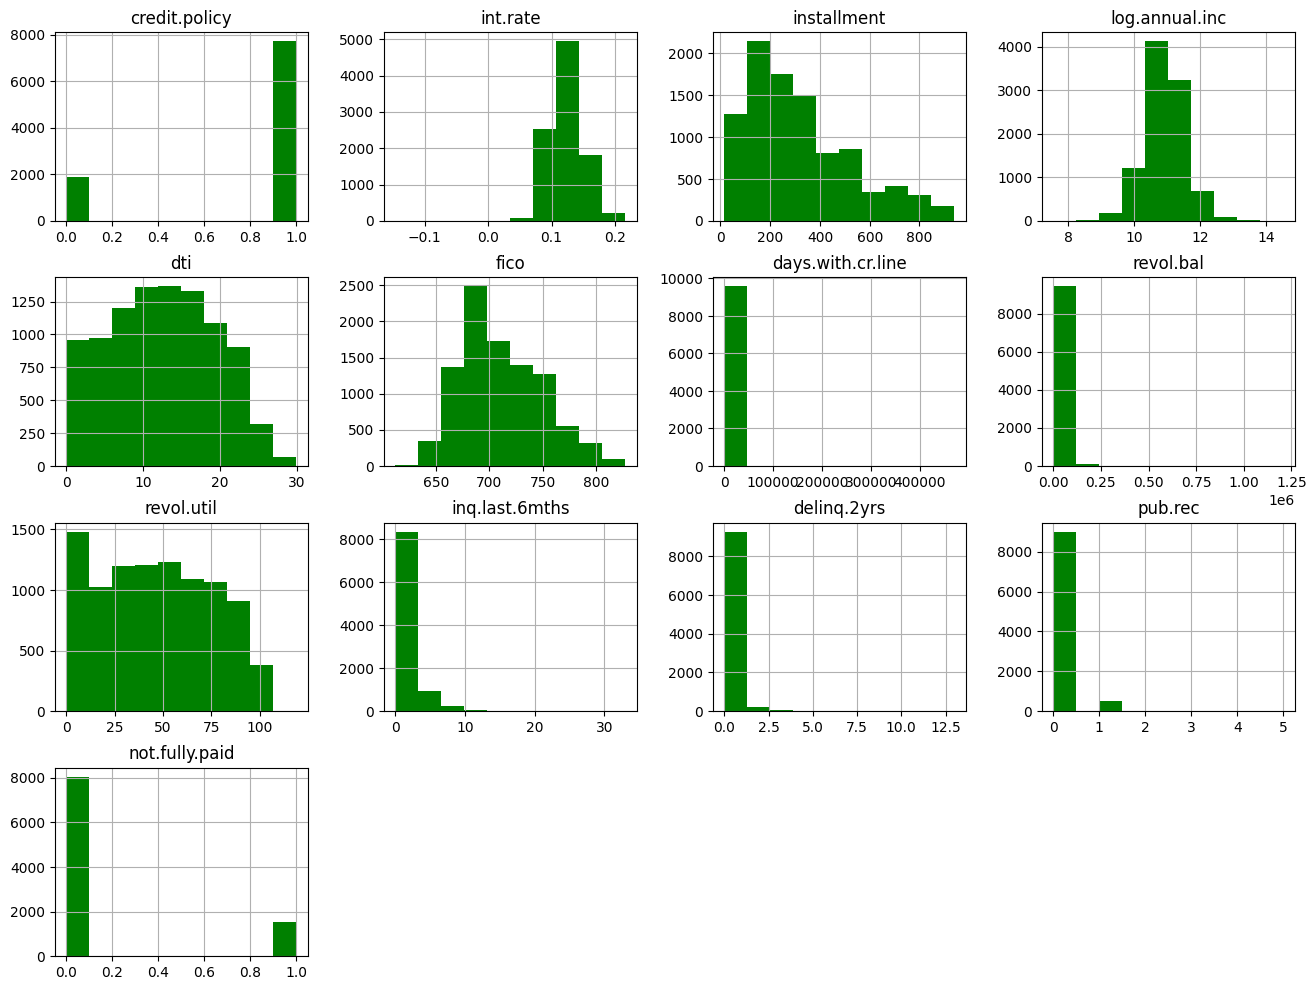

In [118]:
Data.hist(bins=10 ,figsize=(16,12), color = 'Green')
plt.show()

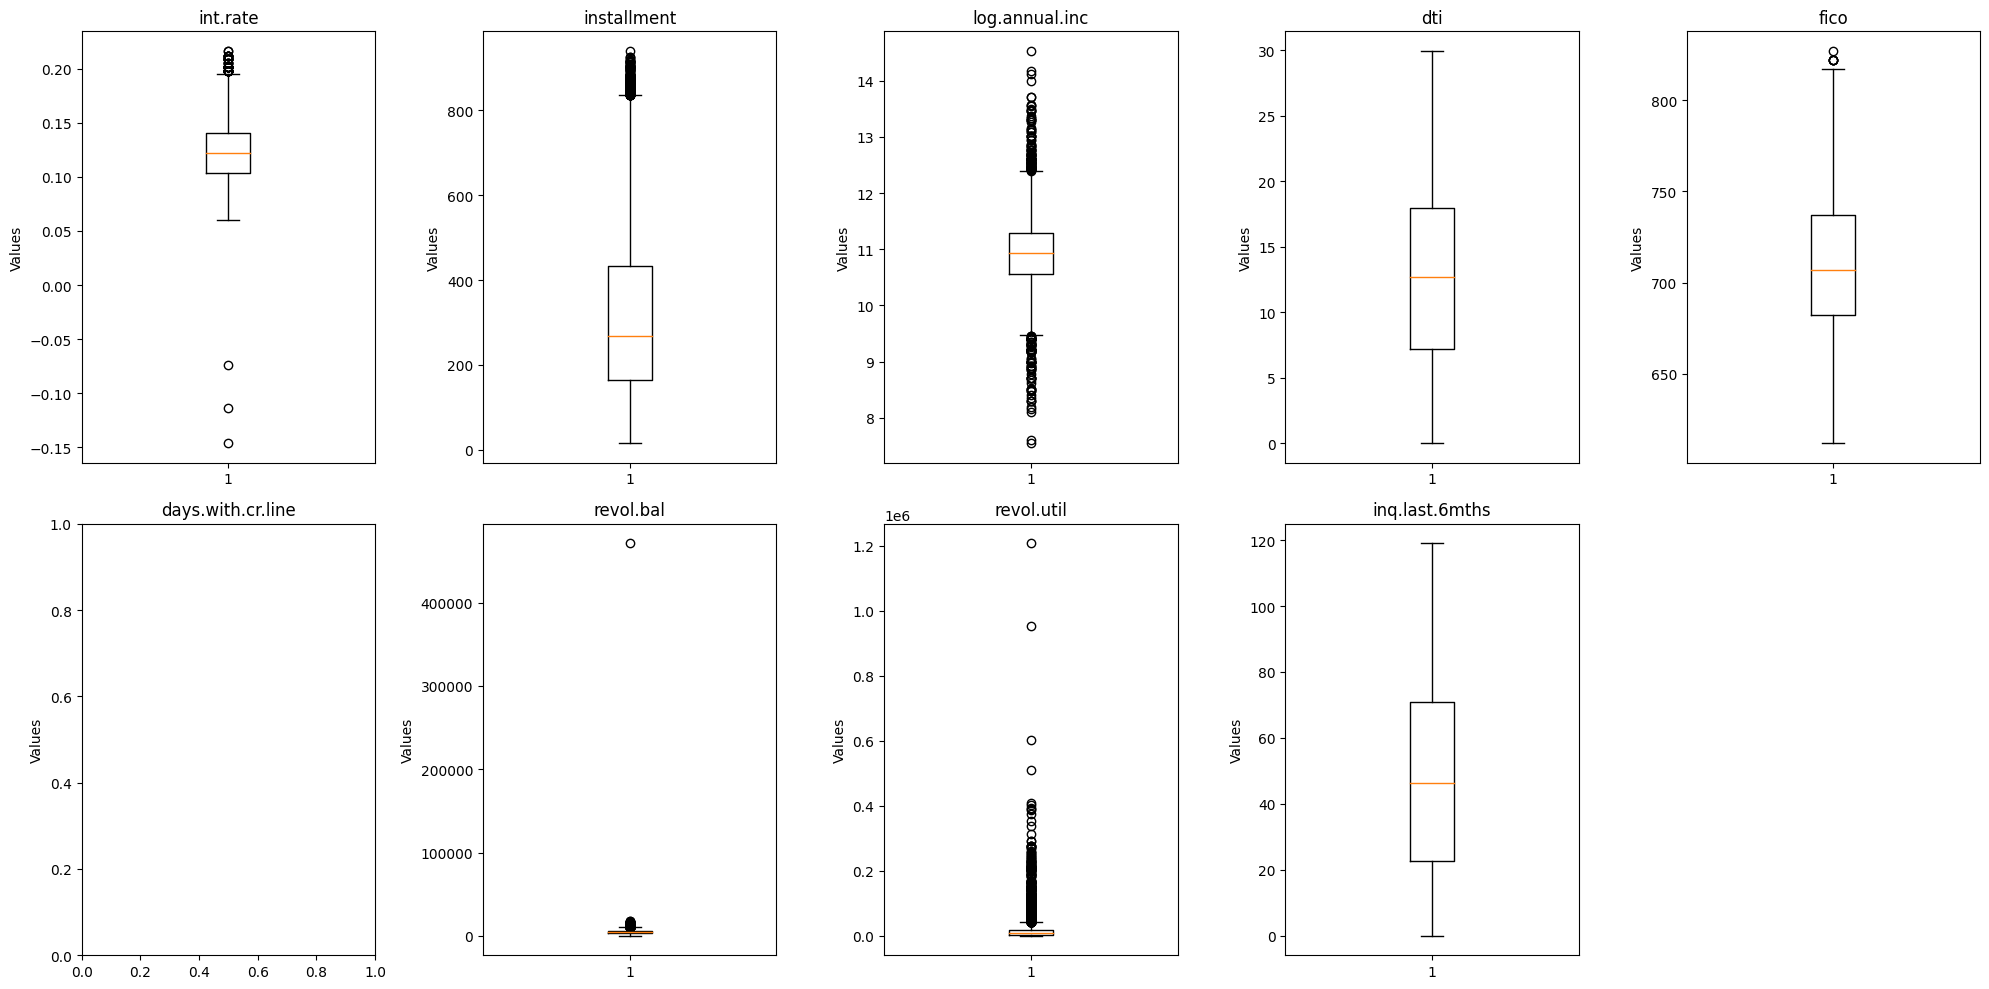

In [119]:
numerical_columns = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths']

# Creating subplots with two rows and five columns
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Reshaping the axs array to a flattened 1D array for easy indexing
axs = axs.flatten()

# Creating separate box plots for each numerical column
for i, column in enumerate(numerical_columns):
    if i < 5:
        axs[i].boxplot(Data[column])
    else:
        axs[i+1].boxplot(Data[column])
    
    axs[i].set_title(column)  # Setting the title as the column name
    axs[i].set_ylabel('Values')

# Removing the empty subplot in the second row
fig.delaxes(axs[9])

plt.tight_layout()  # Adjusts the spacing between subplots
plt.show()


We observe that, there are outliers in different columns ['int.rate', 'installment', 'log.annual.inc', 'days.with.cr.line', 'revol.bal', 'revol.util']. For detecting and removing outliers, there are several methods and I chose Tukey's method which is based on quantile range to make our dataset cleaned and pre-prossessed.

When plotting box plots to detect outliers in a dataset, separate box plots have been created for each numerical column rather than plotting all columns in one graph with a common y-axis. This is because each column may have different ranges and scales, which can make it difficult to interpret the results accurately when they are all plotted on the same y-axis.

In [120]:
def remove_outliers(data, columns, factor=1.5):
    cleaned_data = data.copy()  # Create a copy of the original data
    
    for column in cols:
        # Calculate the IQR for the column
        Q1 = cleaned_data[column].quantile(0.25)
        Q3 = cleaned_data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the upper and lower bounds for outliers
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        
        # Identify outliers based on the bounds
        outliers = (cleaned_data[column] < lower_bound) | (cleaned_data[column] > upper_bound)
        
        # Replace outliers with NaN values
        cleaned_data.loc[outliers, column] = np.nan
    
    # Drop rows with any NaN values
    cleaned_data.dropna(inplace=True)
    
    return cleaned_data


In [121]:
#Selecting columns having outliers
cols = ['int.rate', 'installment', 'log.annual.inc', 'days.with.cr.line', 'revol.bal', 'revol.util']

#Invoking the function to remove outliers
cleaned_data = remove_outliers(Data, cols)

In [122]:
print(f'Before removing the outliers, the shape of dataset was: {Data.shape}')
print(f'After removing the outliers, the shape of cleaned dataset is: {cleaned_data.shape}')

Before removing the outliers, the shape of dataset was: (9578, 14)
After removing the outliers, the shape of cleaned dataset is: (8159, 14)


## Task 2: From data feature distributions, please discuss whether we should normalise these features. 

In order to see if we need to normalise these features, we need to use 'describe' method to see the overall distribution of these features.

In [123]:
cleaned_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,8159.0,0.824979,0.380009,0.000000,1.000000,1.000000,1.000000,1.000000
int.rate,8159.0,0.121494,0.025821,0.060000,0.102500,0.122100,0.139200,0.194700
installment,8159.0,298.203602,183.074701,15.690000,161.530000,260.190000,401.600000,836.230000
log.annual.inc,8159.0,10.862511,0.512476,9.469623,10.518673,10.858999,11.217211,12.388394
dti,8159.0,12.408560,6.816996,0.000000,7.070000,12.390000,17.680000,29.950000
fico,8159.0,710.246109,37.779524,612.000000,682.000000,707.000000,737.000000,822.000000
days.with.cr.line,8159.0,4161.586336,1998.793368,180.041667,2670.041667,3900.000000,5353.979166,10080.000000
revol.bal,8159.0,10108.976100,9152.764198,0.000000,2865.500000,7494.000000,14969.500000,40781.000000
revol.util,8159.0,45.843602,28.659267,0.000000,22.000000,44.800000,69.100000,119.000000
inq.last.6mths,8159.0,1.556931,2.192593,0.000000,0.000000,1.000000,2.000000,33.000000


The range of values for each feature is significantly distinct, as can be seen by looking at the descriptive statistics of the features. After normalization, each column in the dataset will have values ranging between 0 and 1

Normalisation may enhance the model's performance. It is simpler for the model to learn the patterns in the data when the characteristics are normalised such that they have comparable ranges.

Based on the information provided, it is recommended to normalize the features in this dataset.

## Data Analytics and Classification

## Task 3: It is unnecessary to use all 13 features as input of the logistic regression model. To select relevant features, we can plot the heatmap between two features to filter relevant features as our input. 

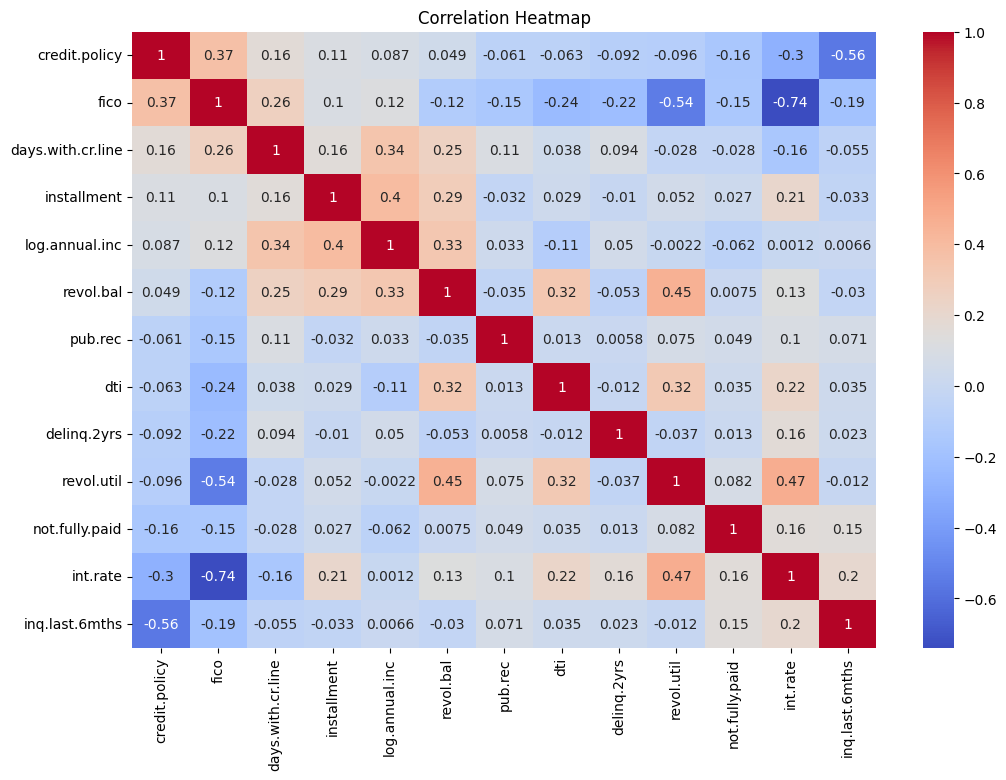

In [124]:
# Calculate the correlation matrix
corr_matrix = cleaned_data.corr()['credit.policy'].sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(cleaned_data[corr_matrix.index].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Heatmaps helps us to find different correlations between each feature and 'credit.policy'. We only reserve features that have positive correlations with 'credit.policy' by removing features with a very low and negative correlation with 'credit_policy'. We only select 'fico', 'days.with.cr.line' 'installment' features for training the model. (they have strong and positive correlation with 'credit_policy' as compared to other features).

## Data Preprocess

### Process of Object data type

The logistic regression model cannot well process the object data type. We convert this data type with OneHotEncoder such that this feature can be handled by the logistic regression model. 

In [125]:
dummy_purpose = pd.get_dummies(cleaned_data['purpose'])
dummy_purpose.head() # OneHotEncoder 
New_Data = pd.concat((cleaned_data.iloc[:,0], dummy_purpose, cleaned_data.iloc[:,2:]), axis=1)
New_Data.head()

,credit.policy,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0,0,1,0,0,0,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854.0,52.1,0,0,0,0.160071
1,1,0,1,0,0,0,0,0,0.1071,228.22,11.082143,14.29,707,2760.000000,33623.0,76.7,0,0,0,0.000000
3,1,0,0,1,0,0,0,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667.0,73.2,1,0,0,0.000000
4,1,0,1,0,0,0,0,0,0.1426,102.92,11.299732,14.97,667,4066.000000,4740.0,39.5,0,1,0,0.000000
6,1,0,0,1,0,0,0,0,0.1496,194.02,10.714418,4.00,667,3180.041667,3839.0,76.8,0,0,1,1.000000


### Dataset classification
We classify all data records into training set (80%), validation set (10%)  and test set (10%) so that we can determine hyper-parameters with k-cross validation. 

Sort all records by an ascending order of 'credit.policy'. and select the first 90% as the training and validation sets. The rest 10% will be used as the test set. 

In [126]:
New_Data.sort_values(by=['credit.policy'])
print(New_Data['credit.policy'].value_counts())


1    6731
0    1428
Name: credit.policy, dtype: int64


We complete dataset classification as below. 

In [127]:
x_ex1 = New_Data.copy().loc[:,['fico', 'days.with.cr.line', 'installment']]
y_ex1 = New_Data.copy()['credit.policy']

X = x_ex1.values
y = y_ex1.values

In [128]:
from sklearn.linear_model import LogisticRegression

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Split training data further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.11, random_state=42)

# Print the shapes of the resulting sets
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)


Training data shape: (6535, 3)
Validation data shape: (808, 3)
Test data shape: (816, 3)


### Data normalisation

## Task 4: Recall that we have observed large value discrepancies between these features. It is necessary to normalise these features before we use them to train our models.  Here, we imply standardization method to normalise our dataset as below. 

In [129]:
from sklearn.preprocessing import StandardScaler

# Initializing StandardScaler object
scaler = StandardScaler()

train_data = scaler.fit_transform(X_train)
val_data = scaler.transform(X_val)
test_data = scaler.transform(X_test)


The fit_transform() method of the StandardScaler object is called on the training data X_train. This method fits the scaler to the training data, validation data and test data,by transforming data by centering and scaling it

## Model Evaluation
In this stage, we are going to train a logistic regression model. Cross validation will be used to determine hyper-parameters and evaluate model performance.


### Logistic Regression Model

## Task 5: Train a Logistic Regression Model with training dataset.

In [130]:
# Define the logistic regression model
model_log = LogisticRegression()

# Define a parameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(model_log, param_grid=param_grid, cv=9)
grid_search.fit(train_data, y_train)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model performance using cross-validation on the training set
cv_scores = cross_val_score(grid_search.best_estimator_, train_data, y_train, cv=9)
print("Training cross-validation accuracy:", cv_scores.mean())

# Predict the labels for the training set
train_preds = grid_search.best_estimator_.predict(train_data)

# Calculate the accuracy score on the training set
train_acc = accuracy_score(y_train, train_preds)
print("Training accuracy:", train_acc)

# Evaluate the model performance on the validation set
val_preds = grid_search.best_estimator_.predict(val_data)
val_acc = accuracy_score(y_val, val_preds)
print("Validation accuracy:", val_acc)

# Evaluate the model performance on the test set
test_preds = grid_search.best_estimator_.predict(test_data)
test_acc = accuracy_score(y_test, test_preds)
print("Test accuracy:", test_acc)


Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Training cross-validation accuracy: 0.8615151978288155
Training accuracy: 0.8622800306044377
Validation accuracy: 0.8613861386138614
Test accuracy: 0.8700980392156863


Breaking down above code:
1. The varible 'param_grid' stores 3 hyper parameters that will be tuned.
2. 'GridSearchCV' is used to find the best hyperparameter (best_params) fit. 
3. The cross_val_score() function is used to perform cross-validation on the training data. It uses the best estimator found during the grid search (grid_search.best_estimator_) to evaluate the model's performance.
4.The best estimator obtained from the grid search is used to predict the labels for the training data. 
5. Similarely, the best estimator is used to predict the labels for the validation data and test data.

Overall, this code performs grid search cross-validation to find the best hyperparameters for the logistic regression model and evaluates its performance on the training, validation, and test sets using accuracy scores.

#Evaluating model on validaiton and test set on the basis of other performance metrics such as Precision, Recall and F1

In [131]:
# Evaluating the model performance on the validation set
val_precision = precision_score(y_val, val_preds)
val_recall = recall_score(y_val, val_preds)
val_f1 = f1_score(y_val, val_preds)

print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1-score:", val_f1)

Validation Precision: 0.8569570871261378
Validation Recall: 0.9969742813918305
Validation F1-score: 0.9216783216783218


In [132]:
# Evaluating the model performance on the validation set
test_precision = precision_score(y_test, test_preds)
test_recall = recall_score(y_test, test_preds)
test_f1 = f1_score(y_test, test_preds)

print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-score:", test_f1)

Test Precision: 0.8685567010309279
Test Recall: 0.9941002949852508
Test F1-score: 0.9270976616231087


#Analysis of Prescion, Recall and F1 for validaiton set
1. The precision of 0.8569 indicates that when the model predicts a positive outcome for the validation set, it is correct around 85.69% of the time.
2. The recall of 0.9969 means that, out of all the positive instances in the validation set, approximately 99.69% of them are correctly identified as true positives, while the remaining 0.31% are false negatives
3. F1-score of 0.9217 indicates that the model achieves a reasonably good balance between precision and recall on the validation set


## Task 6: To better understand our result, we visualize the performance evaluation by comparing the model accuracy of the Logistic Regression model on the training dataset and each validation dataset.

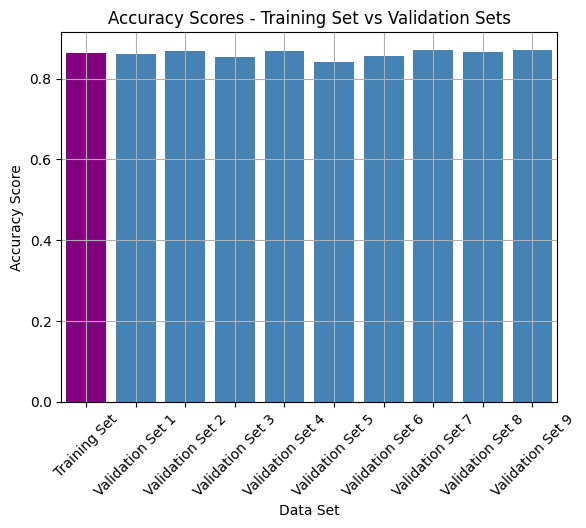

In [133]:
 # Create a list of labels for the bar graph
labels = ['Training Set'] + ['Validation Set {}'.format(i+1) for i in range(len(cv_scores))]

# Create a list of accuracy scores
accuracy_scores = [train_acc] + cv_scores.tolist()

# Set the positions of the bars on the x-axis
x = np.arange(len(labels))

bar_colors = ['purple'] + ['steelblue'] * len(cv_scores)

# Plot the bar graph
plt.bar(x, accuracy_scores, color = bar_colors)

# Add labels, title, and grid to the plot
plt.xlabel('Data Set')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores - Training Set vs Validation Sets')
plt.xticks(x, labels, rotation=45)
plt.grid(True)

# Adjust x-axis limits to remove empty space
plt.xlim(-0.5, len(labels) - 0.5)

# Display the plot
plt.show()


##Analysis
From the visualised results, we can observe that the model accuracy on validation dataset is 86.13%, which is only slightly lower than the accuracy on the training dataset 86.22%. This result is convincing since we have conducted 9 fold cross validation. Our cross validation indicates that we have obtained an accurate model. 

## Note that the test dataset is not used for evaluation. Since there is no hyperparameter in the Logistic Regression model, the cross-validation has reflected the performance of the model on unknown datasets. 